In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import seaborn as sns

In [2]:
df=pd.read_csv('/home/srikanth/Downloads/IPL Data Analysis-20210201T010634Z-001/IPL Data Analysis/predict.csv')

In [3]:
X=df[['day','month','year','venue average runs in 1st innings','venue average wickets in 1st innings']]
y=df[['total runs in 1st innings']]

In [4]:
team_batting1=pd.get_dummies(df['team_batting_first'],prefix='first')
team_batting2=pd.get_dummies(df['team_batting_second'],prefix='second')
toss=[]
for i in range(len(df)):
    if df['team_batting_first'].iloc[i]==df['toss_winner'].iloc[i]:
        toss.append(1)
    else:
        toss.append(0)
city=pd.get_dummies(df['city'],prefix='city')
X=pd.concat([X, team_batting1,team_batting2,city], axis=1)
X['toss']=toss

In [5]:
target=[]
for i in range(len(y)):
    target.append(y['total runs in 1st innings'].iloc[i]//5)

/home/srikanth/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

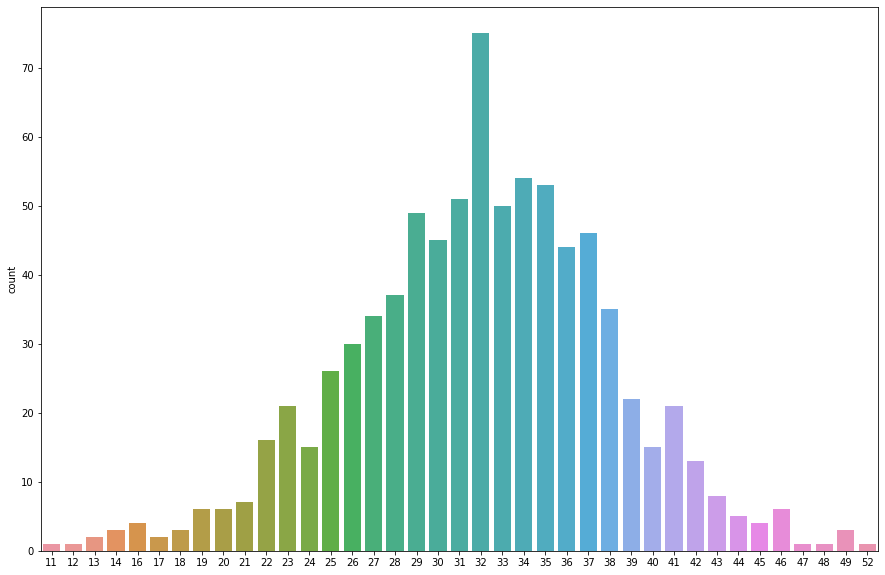

In [6]:
plt.figure(figsize=[15,10])
sns.countplot(target)

In [7]:
from imblearn.over_sampling import RandomOverSampler

over = RandomOverSampler()
X, target = over.fit_resample(X, target)

In [8]:
X

,day,month,year,venue average runs in 1st innings,venue average wickets in 1st innings,first_Chennai Super Kings,first_Deccan Chargers,first_Delhi Capitals,first_Delhi Daredevils,first_Gujarat Lions,...,city_Kolkata,city_Mumbai,city_Nagpur,city_Port Elizabeth,city_Pune,city_Raipur,city_Rajkot,city_Ranchi,city_Visakhapatnam,toss
0,18,4,2008,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19,4,2008,0.000000,0.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,19,4,2008,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20,4,2008,0.000000,0.000000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,20,4,2008,0.000000,0.000000,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,23,4,2013,152.836028,6.064812,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2921,23,4,2013,152.836028,6.064812,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2922,23,4,2013,152.836028,6.064812,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2923,23,4,2013,152.836028,6.064812,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/home/srikanth/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

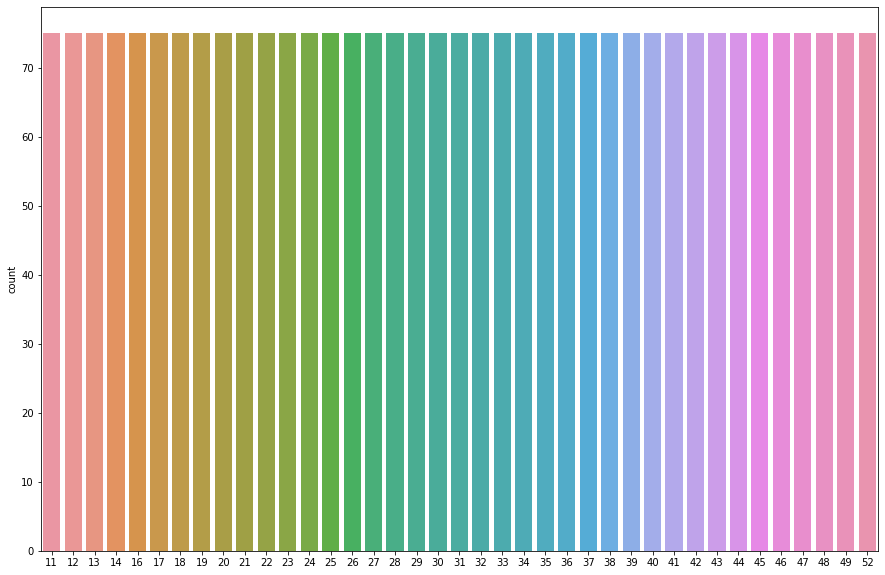

In [9]:
plt.figure(figsize=[15,10])
sns.countplot(target)

In [10]:
target=np.array(target)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.15,random_state=42)
X_test, X_test1, y_test, y_test1 = train_test_split(X_test,y_test, test_size=0.5,random_state=42)

In [12]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train) 


from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)


from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42)
rfc.fit(X_train,y_train)




from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)



/home/srikanth/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:18:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
from sklearn import metrics
print("Knn:",metrics.accuracy_score(y_train, knn.predict(X_train))*100)
print("decision tree:",metrics.accuracy_score(y_train, dtc.predict(X_train))*100)
print("random forest:",metrics.accuracy_score(y_train, rfc.predict(X_train))*100)
print("XGBOOST:",metrics.accuracy_score(y_train, model.predict(X_train))*100)

Knn: 79.88736926790024
decision tree: 100.0
random forest: 100.0
XGBOOST: 100.0


In [14]:
print("Knn:",metrics.accuracy_score(y_test, knn.predict(X_test))*100)
print("decision tree:",metrics.accuracy_score(y_test, dtc.predict(X_test))*100)
print("random forest:",metrics.accuracy_score(y_test, rfc.predict(X_test))*100)
print("XGBOOST:",metrics.accuracy_score(y_test, model.predict(X_test))*100)

Knn: 63.926940639269404
decision tree: 84.93150684931507
random forest: 84.01826484018264
XGBOOST: 84.01826484018264


In [15]:
print("Knn:",metrics.accuracy_score(y_test1, knn.predict(X_test1))*100)
print("decision tree:",metrics.accuracy_score(y_test1, dtc.predict(X_test1))*100)
print("random forest:",metrics.accuracy_score(y_test1, rfc.predict(X_test1))*100)
print("XGBOOST:",metrics.accuracy_score(y_test1, model.predict(X_test1))*100)

Knn: 69.54545454545455
decision tree: 89.54545454545455
random forest: 88.18181818181819
XGBOOST: 87.72727272727273


In [16]:
X=df[['day','month','year','venue average runs in 1st innings','venue average wickets in 1st innings']]
y=df[['total runs in 1st innings']]

In [17]:
target=[]
for i in range(len(y)):
    target.append(y['total runs in 1st innings'].iloc[i]//5)

In [18]:
team_batting1=pd.get_dummies(df['team_batting_first'],prefix='first')
team_batting2=pd.get_dummies(df['team_batting_second'],prefix='second')
toss=[]
for i in range(len(df)):
    if df['team_batting_first'].iloc[i]==df['toss_winner'].iloc[i]:
        toss.append(1)
    else:
        toss.append(0)
city=pd.get_dummies(df['city'],prefix='city')
X=pd.concat([X, team_batting1,team_batting2,city], axis=1)
X['toss']=toss

In [19]:
from sklearn import metrics
print("Knn:",metrics.accuracy_score(target, knn.predict(X))*100)
print("decision tree:",metrics.accuracy_score(target, dtc.predict(X))*100)
print("random forest:",metrics.accuracy_score(target, rfc.predict(X))*100)
print("XGBOOST:",metrics.accuracy_score(target, model.predict(X))*100)

Knn: 43.13725490196079
decision tree: 93.62745098039215
random forest: 93.01470588235294
XGBOOST: 92.8921568627451


In [20]:

import statistics
statistics.stdev(target)

6.082762530298219

In [21]:
df1=pd.DataFrame()
df1['target']=target
df1['decision tree']=dtc.predict(X)
df1['random forest']=rfc.predict(X)
df1['XG boost']=model.predict(X)

In [22]:
df2=df1[(df1['target']!=df1['decision tree']) & (df1['target']!=df1['random forest']) & (df1['target']!=df1['XG boost'])]

In [23]:
df1['decision tree']=df1['decision tree']*5
df1['random forest']=df1['random forest']*5
df1['XG boost']=df1['XG boost']*5

In [24]:
df1['total runs']=y['total runs in 1st innings']

In [25]:
df1['difference in decision tree']=abs(df1['total runs']-df1['decision tree'])

/home/srikanth/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='difference in decision tree', ylabel='count'>

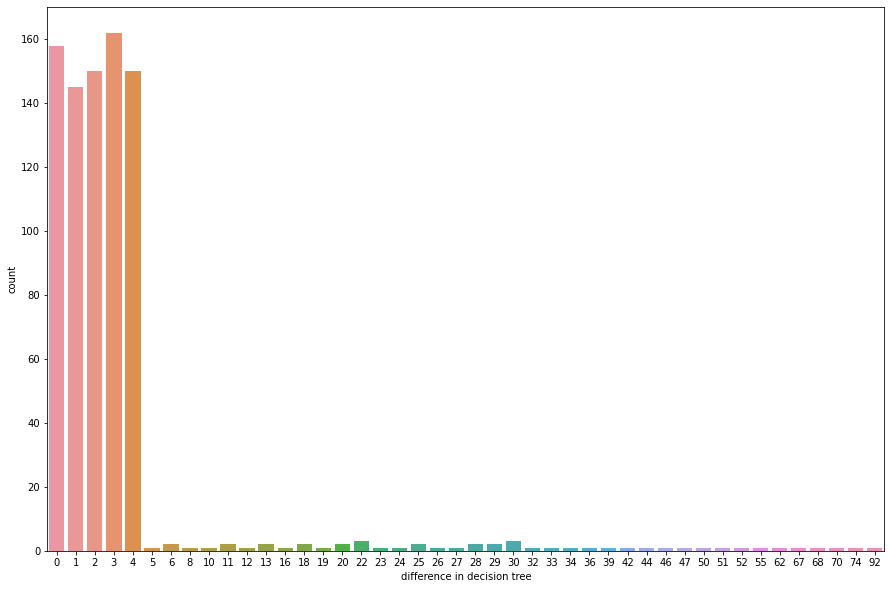

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(df1['difference in decision tree'])

In [27]:
df1['difference in random forest']=abs(df1['total runs']-df1['random forest'])

/home/srikanth/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='difference in random forest', ylabel='count'>

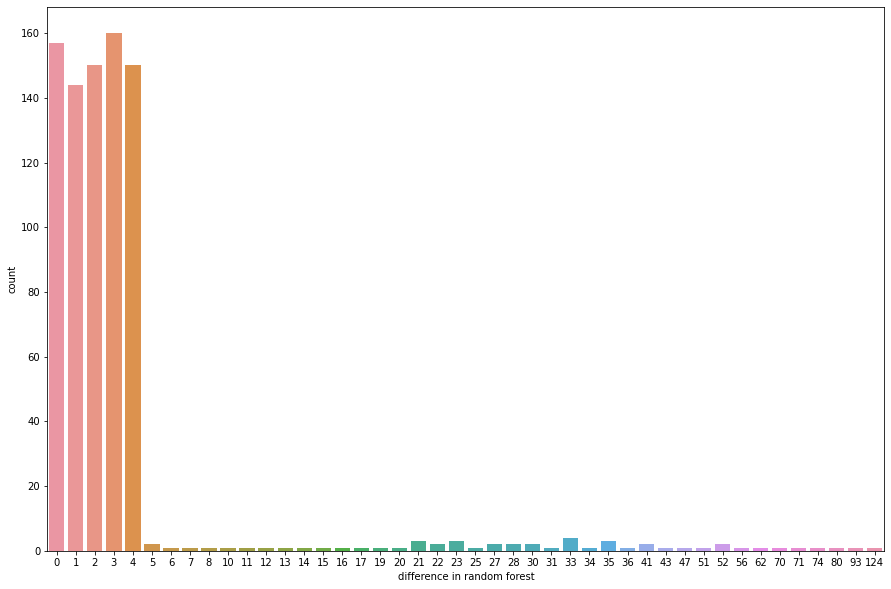

In [28]:
plt.figure(figsize=(15,10))
sns.countplot(df1['difference in random forest'])

In [29]:
df1['difference in XG boost']=abs(df1['total runs']-df1['XG boost'])

/home/srikanth/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='difference in XG boost', ylabel='count'>

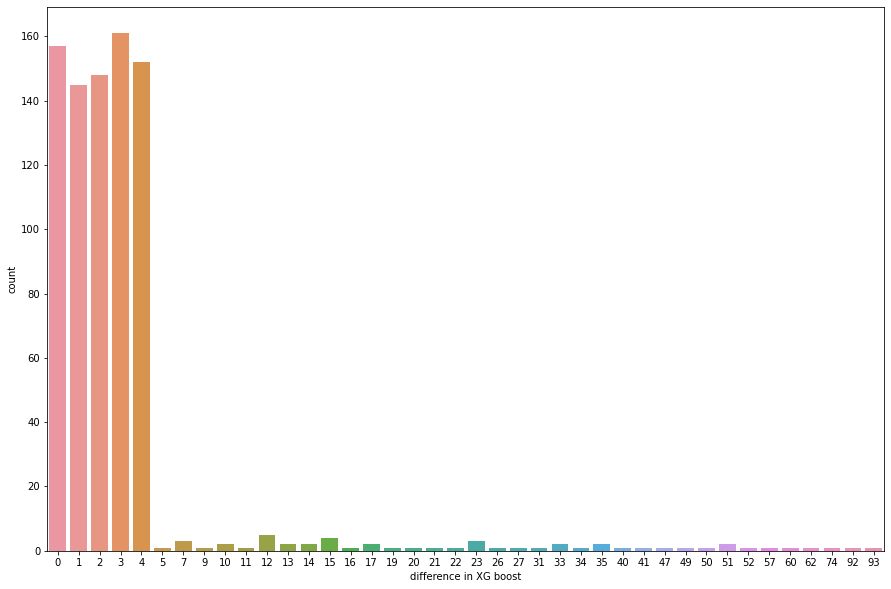

In [30]:
plt.figure(figsize=(15,10))
sns.countplot(df1['difference in XG boost'])

In [31]:
df1['average']=(df1['decision tree']+df1['random forest']+df1['XG boost'])/3

In [32]:
df1['average difference']=abs(df1['total runs']-df1['average'])

/home/srikanth/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='average difference'>

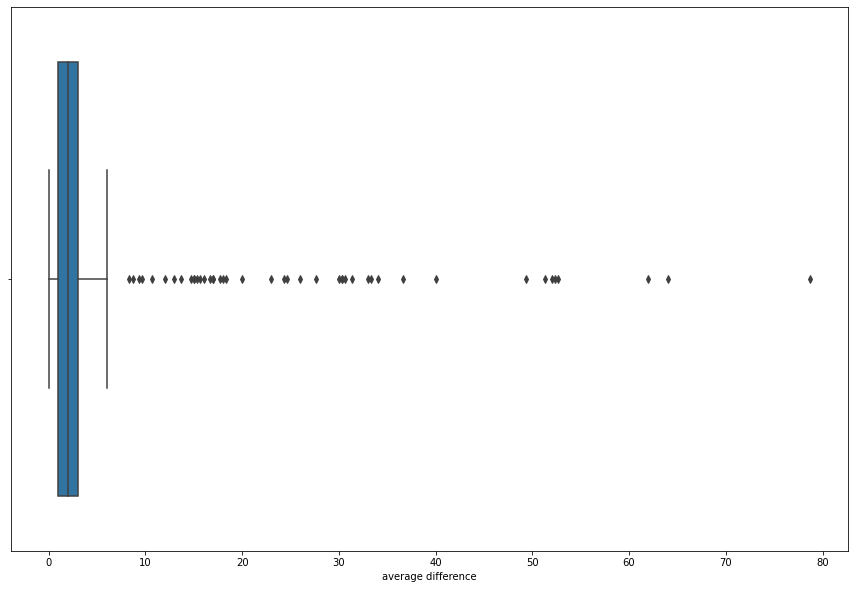

In [33]:
plt.figure(figsize=(15,10))
sns.boxplot(df1['average difference'])

/home/srikanth/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='difference in decision tree'>

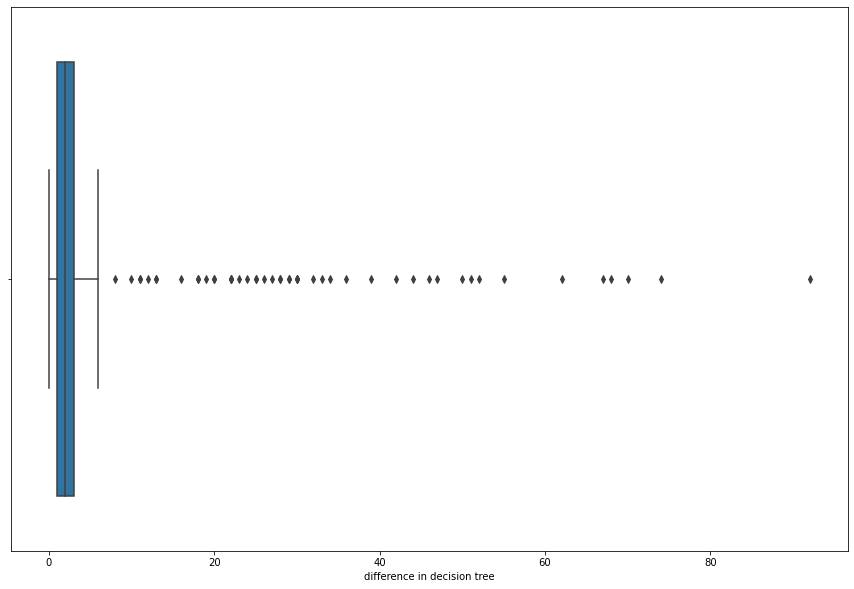

In [34]:
plt.figure(figsize=(15,10))
sns.boxplot(df1['difference in decision tree'])

/home/srikanth/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='difference in random forest'>

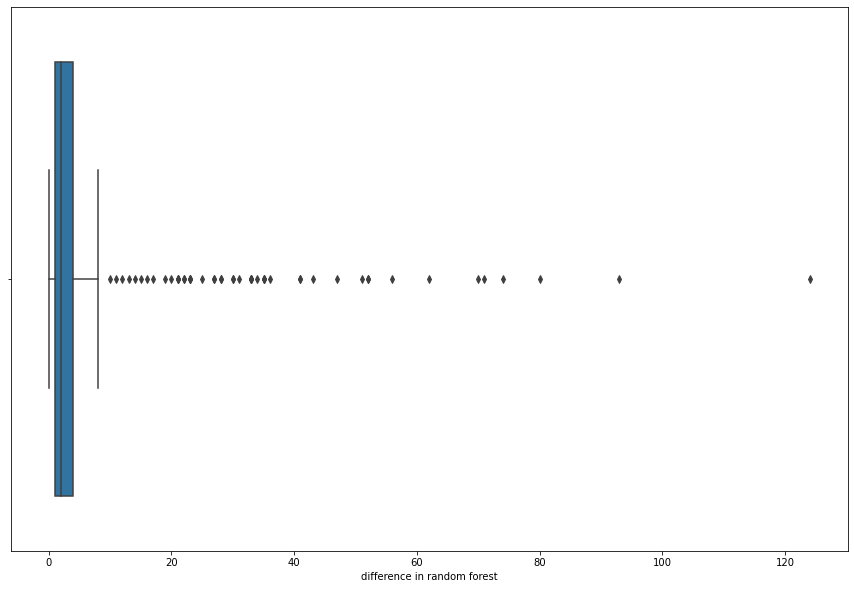

In [35]:
plt.figure(figsize=(15,10))
sns.boxplot(df1['difference in random forest'])

/home/srikanth/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='difference in XG boost'>

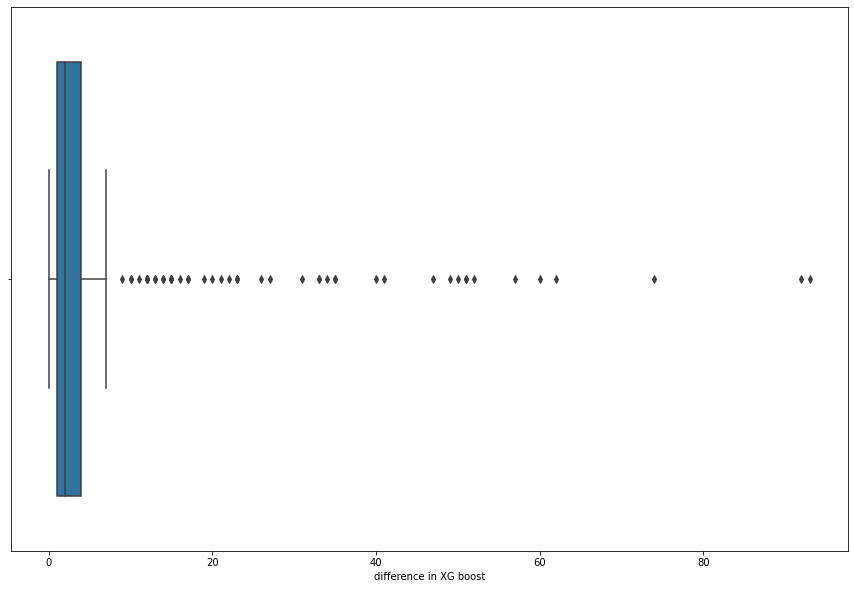

In [36]:
plt.figure(figsize=(15,10))
sns.boxplot(df1['difference in XG boost'])

In [37]:
df1['average difference'].std()

7.127708900109096

In [38]:
df1['average difference'].mean()

3.395016339869281

In [39]:
df1['average difference'].median()

2.0

In [40]:
df1['average difference'].mode()

0    3.0
dtype: float64

In [41]:
df1['average difference'].var()

50.80423416469442

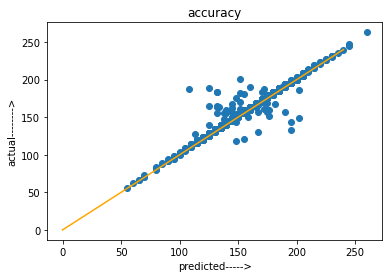

In [42]:
plt.scatter(df1['average'],df1['total runs'])
plt.plot(range(0,250,10),range(0,250,10),color='orange')
plt.title('accuracy')
plt.xlabel('predicted----->')
plt.ylabel('actual-------->')
plt.show()

/home/srikanth/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='average', ylabel='total runs'>

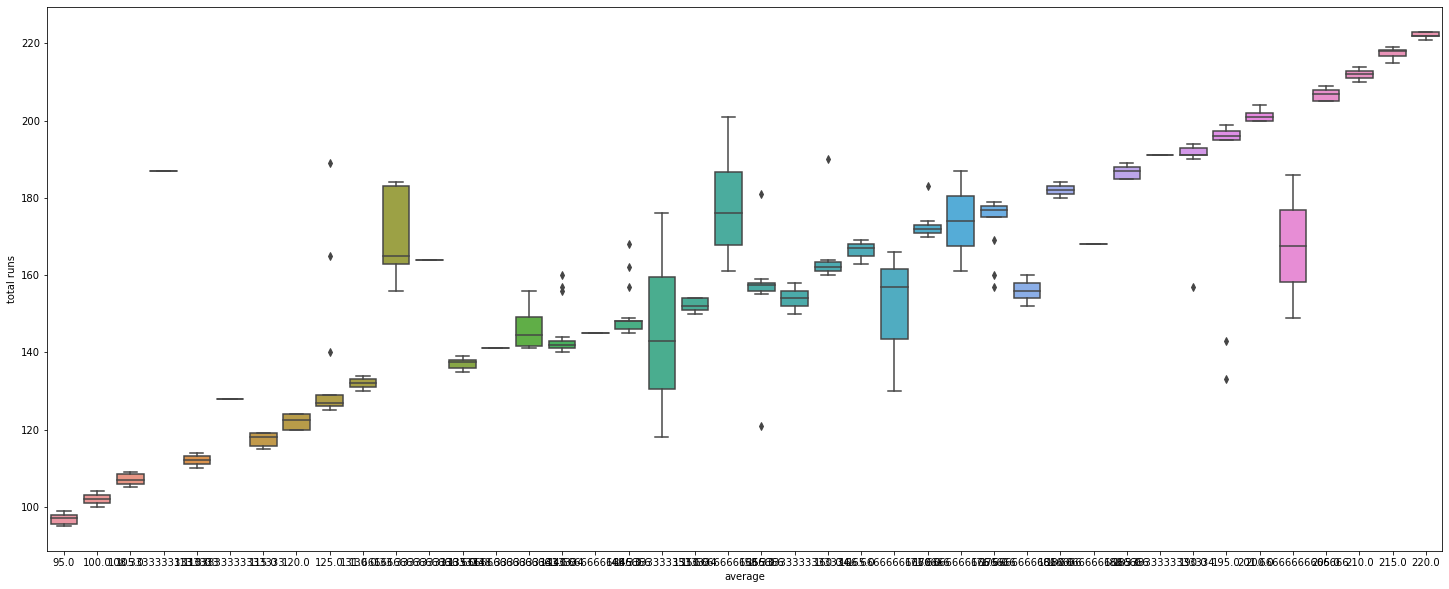

In [43]:
plt.figure(figsize=(25,10))
sns.boxplot(df1[(df1['average']>90) & (df1['average']<225)]['average'],df1[(df1['average']>90) & (df1['average']<225)]['total runs'])

In [44]:
df1['percentage error']=(df1['average difference']/df1['total runs'])*100  

In [45]:
df1['percentage error'].mean()

2.1569588035605163

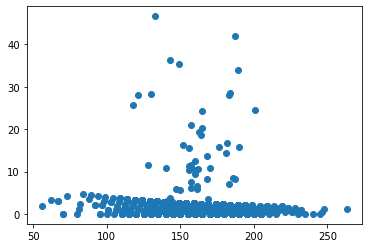

In [46]:
plt.scatter(df1['total runs'],df1['percentage error'])

/home/srikanth/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

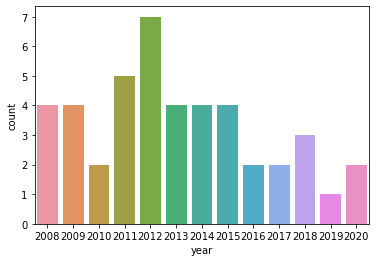

In [47]:
sns.countplot(df[df1['percentage error']>5]['year'])

In [48]:
(len(df[(df1['percentage error']>5) & (df['year']<=2012)]['year'])/len(df[(df1['percentage error']>5)]['year']))*100

50.0

In [49]:
df[(df1['percentage error']>5)]['year'].value_counts().sort_index()

2008    4
2009    4
2010    2
2011    5
2012    7
2013    4
2014    4
2015    4
2016    2
2017    2
2018    3
2019    1
2020    2
Name: year, dtype: int64

In [50]:
df['year'].value_counts().sort_index()

2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
Name: year, dtype: int64

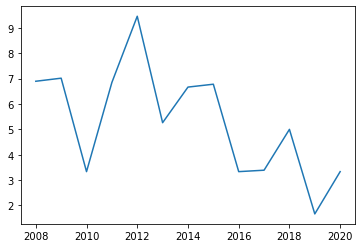

In [51]:
plt.plot(df['year'].value_counts().sort_index().index,(df[(df1['percentage error']>5)]['year'].value_counts().sort_index()/df['year'].value_counts().sort_index()*100))

<AxesSubplot:>

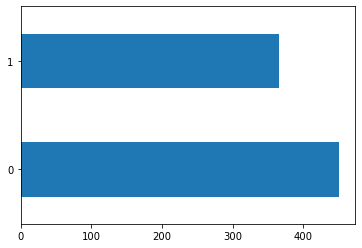

In [52]:
df['target'].value_counts().plot(kind='barh')

In [53]:
df['target'].value_counts().index

Int64Index([0, 1], dtype='int64')

<AxesSubplot:>

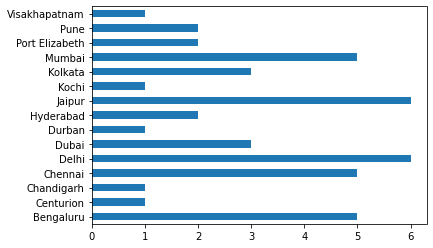

In [54]:

(df[(df1['percentage error']>5)]['city'].value_counts().sort_index()).plot(kind='barh')


In [55]:
r=[]
mse=[]
mae=[]
acc=[]
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
df=pd.read_csv('/home/srikanth/Downloads/IPL Data Analysis-20210201T010634Z-001/IPL Data Analysis/predict.csv')
for j in range(5,105,5):
    print(j)
    X=df[['day','month','year','venue average runs in 1st innings','venue average wickets in 1st innings']]
    y=df[['total runs in 1st innings']]
    team_batting1=pd.get_dummies(df['team_batting_first'],prefix='first')
    team_batting2=pd.get_dummies(df['team_batting_second'],prefix='second')
    toss=[]
    for i in range(len(df)):
        if df['team_batting_first'].iloc[i]==df['toss_winner'].iloc[i]:
            toss.append(1)
        else:
            toss.append(0)
    city=pd.get_dummies(df['city'],prefix='city')
    X=pd.concat([X, team_batting1,team_batting2,city], axis=1)
    X['toss']=toss
    target=[]
    for i in range(len(y)):
        target.append(y['total runs in 1st innings'].iloc[i]//j)
    over = RandomOverSampler()
    X, target = over.fit_resample(X, target)
    target=np.array(target)
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.15,random_state=42)
    X_test, X_test1, y_test, y_test1 = train_test_split(X_test,y_test, test_size=0.5,random_state=42)

    knn = KNeighborsClassifier(n_neighbors=5) 
    knn.fit(X_train, y_train) 

    dtc = DecisionTreeClassifier()
    dtc = dtc.fit(X_train,y_train)

    rfc=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42)
    rfc.fit(X_train,y_train)

    model = XGBClassifier()
    model.fit(X_train, y_train)
    
    X=df[['day','month','year','venue average runs in 1st innings','venue average wickets in 1st innings']]
    y=df[['total runs in 1st innings']]
    team_batting1=pd.get_dummies(df['team_batting_first'],prefix='first')
    team_batting2=pd.get_dummies(df['team_batting_second'],prefix='second')
    toss=[]
    for i in range(len(df)):
        if df['team_batting_first'].iloc[i]==df['toss_winner'].iloc[i]:
            toss.append(1)
        else:
            toss.append(0)
    city=pd.get_dummies(df['city'],prefix='city')
    X=pd.concat([X, team_batting1,team_batting2,city], axis=1)
    X['toss']=toss
    target=[]
    for i in range(len(y)):
        target.append(y['total runs in 1st innings'].iloc[i]//j)
    df1=pd.DataFrame()
    df1['total runs']=y['total runs in 1st innings']
    df1['target']=target
    df1['decision tree']=dtc.predict(X)
    df1['random forest']=rfc.predict(X)
    df1['XG boost']=model.predict(X)
    df1['quant']=np.round((df1['decision tree']+df1['random forest']+df1['XG boost'])/3)
    df1['decision tree']=df1['decision tree']*j
    df1['random forest']=df1['random forest']*j
    df1['XG boost']=df1['XG boost']*j
    df1['difference in decision tree']=abs(df1['total runs']-df1['decision tree'])
    df1['difference in random forest']=abs(df1['total runs']-df1['random forest'])
    df1['difference in XG boost']=abs(df1['total runs']-df1['XG boost'])
    df1['average']=(df1['decision tree']+df1['random forest']+df1['XG boost'])/3
    df1['average difference']=abs(df1['total runs']-df1['average'])
    df1['percentage error']=(df1['average difference']/df1['total runs'])*100  
    r.append(r2_score(df1['total runs'], df1['average']))
    mse.append(mean_squared_error(df1['total runs'], df1['average']))
    mae.append(mean_absolute_error(df1['total runs'], df1['average']))
    acc.append(metrics.accuracy_score(df1['target'], df1['quant']))

5


/home/srikanth/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:19:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
10


/home/srikanth/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:19:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
15


/home/srikanth/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:19:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
20


/home/srikanth/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:19:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
25


/home/srikanth/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:19:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
30


/home/srikanth/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:19:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
35


/home/srikanth/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:19:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
40


/home/srikanth/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:19:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
45


/home/srikanth/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:19:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
50


/home/srikanth/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:19:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
55


/home/srikanth/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:19:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
60


/home/srikanth/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:19:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
65


/home/srikanth/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:19:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
70


/home/srikanth/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:19:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
75


/home/srikanth/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:19:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
80


/home/srikanth/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:19:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
85


/home/srikanth/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:19:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
90


/home/srikanth/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:19:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
95


/home/srikanth/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:19:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
100


/home/srikanth/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:19:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


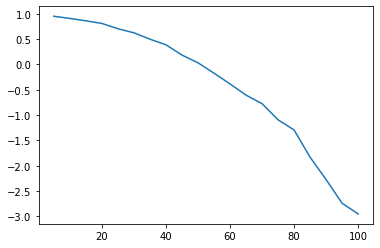

In [56]:
plt.plot(range(5,105,5),r)

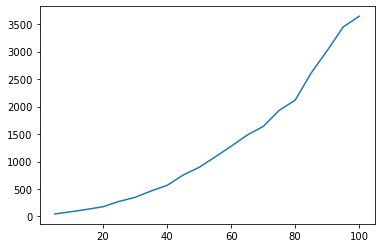

In [57]:
plt.plot(range(5,105,5),mse)

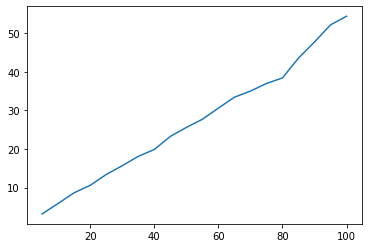

In [58]:
plt.plot(range(5,105,5),mae)

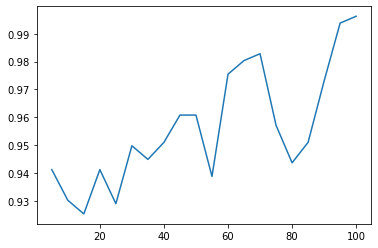

In [59]:
plt.plot(range(5,105,5),acc)